## Reuters 딥러닝 모델 예제

- Reuters 데이터셋은 뉴스 기사를 모아놓은 것으로 주제 분류를 위해 자주 사용하는 데이터
- 데이터셋은 뉴스 기사 텍스트와 46개의 토픽으로 구성

image.png

### 데이터 로드 및 전처리

- 케라스에서는 Reuters 뉴스 기사 데이터를 `reuters.load_data()` 함수를 통해 다운로드가 가능
- 본 예제에서는 `num_words`를 10000개로 제한하여 데이터를 로드
- 기본적으로 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분
- 레이블은 46개의 뉴스 기사의 주제로 구분



In [145]:
import tensorflow.keras as keras
from keras.datasets import reuters

import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data()

print(f"Train data: {train_data.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Test data: {test_data.shape}")
print(f"Test labels: {test_labels.shape}")

Train data: (8982,)
Train labels: (8982,)
Test data: (2246,)
Test labels: (2246,)


- Reuters 데이터셋도 단어 인덱스로만 구성되어 있기 때문에 `reuters.get_word_index()` 함수를 통해 얻은 단어 인덱스 딕셔너리를 이용해 인덱스를 단어들로 변환이 가능

In [146]:
word_idx = reuters.get_word_index()

word_idx

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

- 인덱스 단어 딕셔너리 형태로 만들기 위해서 단어 인덱스 딕셔너리를 역으로 변환

In [147]:
idx_word = {idx: word for word, idx in word_idx.items()}

idx_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

- `train_data[0]`의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줌

- 단어 인덱스에서 0은 패딩을 의미하는 토큰인 `pad`, 1은 문장의 시작을 의미하는 토큰인 `sos`, 2는 OOV(Out Of Vocabulary)를 의미하는 토큰인 `unk`으로 지정
- 그러므로 `i-3`으로 인덱스를 맞춰주고, 해당 토큰들은 `?`로 대체

In [148]:
print(train_data[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [149]:
review = " ".join([idx_word.get(idx - 3, "?") for idx in train_data[0]])

review

'? mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

- 딥러닝 모델의 학습에 사용하기 위해서는 텍스트 데이터를 벡터로 변환해야 함
- 일반적으로 자주 사용되는 원-핫 인코딩(one-hot encoding)을 이용해 텍스트를 0과 1의 벡터로 변환

In [150]:
from itertools import chain

def oh_encoder(data: np.ndarray, dim: int):
    res = np.zeros((data.shape[0], dim))
    for seq_num, idx in enumerate(data):
        res[seq_num, idx] = 1
    
    return res

max_idx = np.max(list(chain.from_iterable(train_data)) + list(chain.from_iterable(test_data)))
x_train = oh_encoder(train_data, max_idx + 1)
x_test = oh_encoder(test_data, max_idx + 1)

- Reuters 데이터셋에서 레이블은 46개의 주제를 구분하기 위한 인덱스로 되어 있음

In [151]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

- 뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환 필요
- 케라스에서는 `utils.to_categorical()`을 이용해 쉽게 변환 가능

In [152]:
from keras.utils import to_categorical

max_n = np.max(np.concatenate((train_labels, test_labels))) # 0부터 시작
y_train = to_categorical(train_labels, num_classes=max_n + 1)
y_test = to_categorical(test_labels, num_classes=max_n + 1)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 모델 구성

- Reuters 데이터셋을 주제별로 분류하기 위한 딥러닝 모델을 정의
- 순차적으로 레이어를 추가하여 단순한 모델을 생성하기 위해 `Sequential()` 함수를 사용
- 첫번째는 유닛수 256개, 활성화 함수는 'relu', 입력 차원은 10000, 이름은 `input`인 `Dense` 레이어를 추가
- 두번째도 마찬가지로 유닛수 256개를 가지고, `relu` 활성화 함수를 사용하며 이름은 `hidden`인 `Dense` 레이어를 추가
- 세번째는 뉴스 주제 갯수로 유닛수를 46개로 지정하고, 다중 분류이므로 활성화 함수는 `softmax`를 사용하고, 이름은 `output`으로 지정한 `Dense` 레이어를 추가


In [153]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping

inp = Input(shape=(max_idx + 1, ), name="Input")
hid_1 = Dense(256, activation="relu", name="Dense_1")(inp)
hid_2 = Dense(256, activation="relu", name="Dense_2")(hid_1)
out = Dense(max_n + 1, activation="softmax", name="Output")(hid_2)

model = Model(inputs=inp, outputs=out)

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["acc"]
)

model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30982)]           0         
                                                                 
 Dense_1 (Dense)             (None, 256)               7931648   
                                                                 
 Dense_2 (Dense)             (None, 256)               65792     
                                                                 
 Output (Dense)              (None, 46)                11822     
                                                                 
Total params: 8009262 (30.55 MB)
Trainable params: 8009262 (30.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
early_stop_cb = EarlyStopping(
    patience=10,
    monitor="val_loss",
    restore_best_weights=True
)

- 생성한 딥러닝 모델을 이용해 Reuters 데이터셋을 학습하기 위해 학습용 데이터셋으로 `x_train`과 `y_train`을 지정
- 에폭(epochs)은 40으로 지정하며, 배치 사이즈는 512로 지정
- 검증을 위해서 테스트 데이터인 `x_test`와 `y_test`를 지정하여 `fit()` 함수를 실행

In [155]:
history = model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=512,
    validation_data=(x_test, y_test),
    callbacks=[early_stop_cb]
)

Epoch 1/40
 7/18 [==========>...................] - ETA: 0s - loss: 3.3216 - acc: 0.4425

18/18 [==============================] - 3s 116ms/step - loss: 2.4822 - acc: 0.5488 - val_loss: 1.5279 - val_acc: 0.6750
Epoch 2/40
18/18 [==============================] - 2s 90ms/step - loss: 1.1088 - acc: 0.7605 - val_loss: 1.1482 - val_acc: 0.7533
Epoch 3/40
18/18 [==============================] - 2s 85ms/step - loss: 0.6513 - acc: 0.8651 - val_loss: 0.9881 - val_acc: 0.7836
Epoch 4/40
18/18 [==============================] - 2s 93ms/step - loss: 0.3702 - acc: 0.9250 - val_loss: 0.9379 - val_acc: 0.7934
Epoch 5/40
18/18 [==============================] - 2s 90ms/step - loss: 0.2324 - acc: 0.9430 - val_loss: 0.9417 - val_acc: 0.7952
Epoch 6/40
18/18 [==============================] - 2s 85ms/step - loss: 0.1789 - acc: 0.9511 - val_loss: 0.9705 - val_acc: 0.8001
Epoch 7/40
18/18 [==============================] - 1s 84ms/step - loss: 0.1547 - acc: 0.9552 - val_loss: 1.0097 - val_acc: 0.7956
Epoch 8/40
18/18 [==============================] - 2s 93ms/step - loss: 0.1421 - acc: 0.9542

- 모델이 잘 학습되었는지 확인하기 위해서 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화

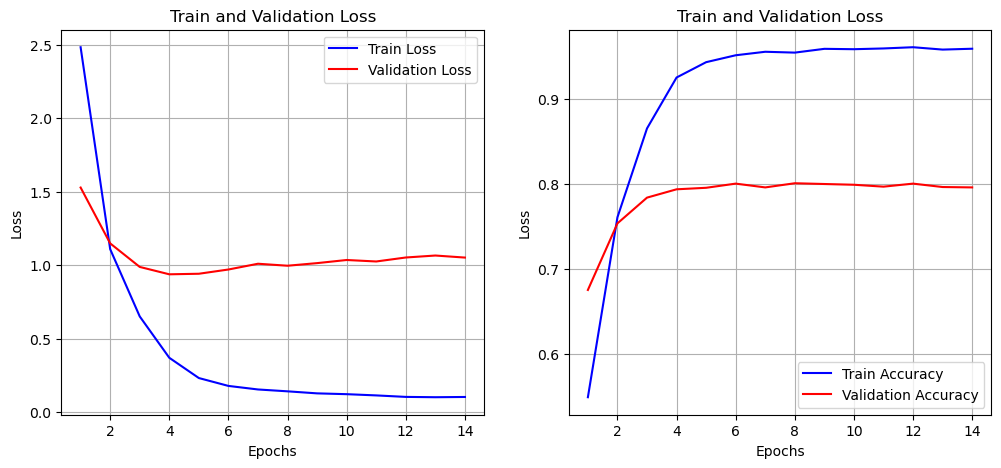

In [156]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
history_dict = history.history
epochs = range(1, len(history_dict["loss"]) + 1)

# Loss
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

ax_loss = fig.add_subplot(1, 2, 1)
ax_loss.plot(epochs, loss, color="b", label="Train Loss")
ax_loss.plot(epochs, val_loss, color="r", label="Validation Loss")

ax_loss.set_title("Train and Validation Loss")
ax_loss.set_xlabel("Epochs")
ax_loss.set_ylabel("Loss")
ax_loss.grid()
ax_loss.legend()

# Accuarcy
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

ax_acc = fig.add_subplot(1, 2, 2)
ax_acc.plot(epochs, acc, color="b", label="Train Accuracy")
ax_acc.plot(epochs, val_acc, color="r", label="Validation Accuracy")

ax_acc.set_title("Train and Validation Loss")
ax_acc.set_xlabel("Epochs")
ax_acc.set_ylabel("Loss")
ax_acc.grid()
ax_acc.legend()

plt.show()

- 모델의 학습 결과를 살펴보면 에폭이 진행될수록 `val_loss`는 계속 증가
- `val_accuracy`는 조금씩 감소
- 모델은 과대적합된 상태

### 가중치 초기화

- Reuters 딥러닝 모델에 가중치 초기화를 적용한 결과를 살펴보기 위해 초기화 `initializer`에 따라 모델을 생성하는 `build_model` 함수를 정의
- 케라스에서는 기본적으로 레이어에 균일분포 초기화를 수행하지만, 다른 초기화 방법과 비교

In [157]:
from keras import initializers

def build_model(initializer):
    inp = Input(shape=(max_idx + 1, ), name="Input")
    hid_1 = Dense(128, activation="relu", kernel_initializer=initializer, name="Dense_1")(inp)
    hid_2 = Dense(128, activation="relu", kernel_initializer=initializer, name="Dense_2")(hid_1)
    out = Dense(max_n + 1, activation="softmax", name="Output")(hid_2)

    model = Model(inputs=inp, outputs=out)

    model.compile(
        loss="categorical_crossentropy",
        optimizer='adam',
        metrics=['acc']
    )

    history = model.fit(
        x_train, y_train,
        epochs=40,
        batch_size=512,
        validation_data=(x_test, y_test),
        callbacks=[early_stop_cb]
    )

    return history

- 모델의 학습 히스토리 결과를 비교해보기 위해서 시각화하는 `diff_history` 함수를 정의

```python
def diff_history(*histories: history 객체들):
    '''각 평가 지표마다 모든 모델의 학습용 지표와 검증용 지표를 각각 실선과 대시선으로 그리는 함수'''
    
    1. 평가 지표 받아 오기(loss, acc, ...)
    2. 각 history 별로 history_dict에 모델 순서별로 지표들을 저장
    3. 평가 지표 별로 for문 돌기
        - ax 생성
        - ax 설정
    4. 3. 안에서 각 history_dict별로 for문 돌기
        - 학습용 지표 plot
        - 검증용 지표 plot
```

In [158]:
def diff_history(*histories):
    metrics = list(metric for metric in histories[0].history.keys() if not metric.startswith("val"))
    colors = ['b', 'r', 'g', 'k', 'y'] # history의 수를 5개까지로 제한
    line_styles = ['-', '--']
    types = ['Train', 'Validation']
    histories_dict = {} # 각 모델별 history
    fig = plt.figure(figsize=(12, 5))

    for i, history in enumerate(histories, start=1):
        histories_dict[i] = history.history
    
    for i, metric in enumerate(metrics, start=1): # 평가 지표
        ax = fig.add_subplot(1, len(metrics), i)
        for history_n, (history_dict, color) in enumerate(zip(histories_dict.values(), colors), start=1): # history
            epochs = range(1, len(history_dict["loss"]) + 1)
            ax.plot(epochs, history_dict[metric], f"{color}{line_styles[0]}", label=f"{types[0]} {metric.capitalize()} {history_n}")
            ax.plot(epochs, history_dict[f'val_{metric}'], f"{color}{line_styles[1]}", label=f"{types[1]} {metric.capitalize()} {history_n}")

        ax.set_title(f"Train and Validation {metric.capitalize()}")
        ax.set_xlabel("Epochs")
        ax.set_ylabel(metric.capitalize())
        ax.grid()
        ax.legend()

    plt.show()

#### 제로 초기화

- 가중치 값을 0으로 초기화하는 모델을 생성하여 학습


In [159]:
zero_history = build_model(initializer=initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 2s 75ms/step - loss: 3.8182 - acc: 0.2141 - val_loss: 3.8061 - val_acc: 0.2110
Epoch 2/40
18/18 [==============================] - 1s 50ms/step - loss: 3.7955 - acc: 0.2170 - val_loss: 3.7839 - val_acc: 0.2110
Epoch 3/40
18/18 [==============================] - 1s 54ms/step - loss: 3.7729 - acc: 0.2786 - val_loss: 3.7619 - val_acc: 0.3620
Epoch 4/40
18/18 [==============================] - 1s 50ms/step - loss: 3.7507 - acc: 0.3517 - val_loss: 3.7401 - val_acc: 0.3620
Epoch 5/40
18/18 [==============================] - 1s 50ms/step - loss: 3.7286 - acc: 0.3517 - val_loss: 3.7184 - val_acc: 0.3620
Epoch 6/40
18/18 [==============================] - 1s 55ms/step - loss: 3.7068 - acc: 0.3517 - val_loss: 3.6971 - val_acc: 0.3620
Epoch 7/40
18/18 [==============================] - 1s 55ms/step - loss: 3.6852 - acc: 0.3517 - val_loss: 3.6760 - val_acc: 0.3620
Epoch 8/40
18/18 [==============================] - 1s 50ms/step - loss: 3.6639 - a

- 기본 모델과 제로 초기화 모델 학습 결과를 비교해보면, 제로 초기화 모델은 학습이 제대로 되고 있지 않다는 것을 알 수 있음

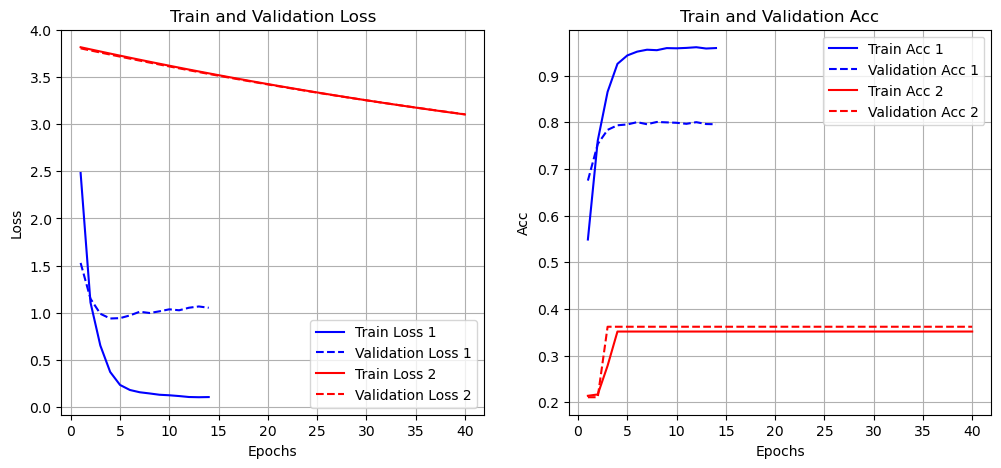

In [160]:
diff_history(history, zero_history)

#### 정규분포 초기화

- 정규분포 초기화 방법도 비교를 위해서 모델을 생성하여 학습

In [161]:
normal_history = build_model(initializer=initializers.RandomNormal())

c:\Users\kksoo\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 2s 74ms/step - loss: 2.9651 - acc: 0.4100 - val_loss: 2.1157 - val_acc: 0.5467
Epoch 2/40
18/18 [==============================] - 1s 51ms/step - loss: 1.6393 - acc: 0.6360 - val_loss: 1.5005 - val_acc: 0.6634
Epoch 3/40
18/18 [==============================] - 1s 55ms/step - loss: 1.1590 - acc: 0.7385 - val_loss: 1.2715 - val_acc: 0.7128
Epoch 4/40
18/18 [==============================] - 1s 50ms/step - loss: 0.8562 - acc: 0.8133 - val_loss: 1.1346 - val_acc: 0.7480
Epoch 5/40
18/18 [==============================] - 1s 56ms/step - loss: 0.6163 - acc: 0.8662 - val_loss: 1.0417 - val_acc: 0.7645
Epoch 6/40
18/18 [==============================] - 1s 49ms/step - loss: 0.4340 - acc: 0.9093 - val_loss: 1.0032 - val_acc: 0.7792
Epoch 7/40
18/18 [==============================] - 1s 50ms/step - loss: 0.3130 - acc: 0.9301 - val_loss: 0.9898 - val_acc: 0.7863
Epoch 8/40
18/18 [==============================] - 1s 54ms/step - loss: 0.2357 - a

- 정규분포로 초기화한 결과는 기본 모델과 유사하지만 조금 더디게 학습된 것을 알 수 있음

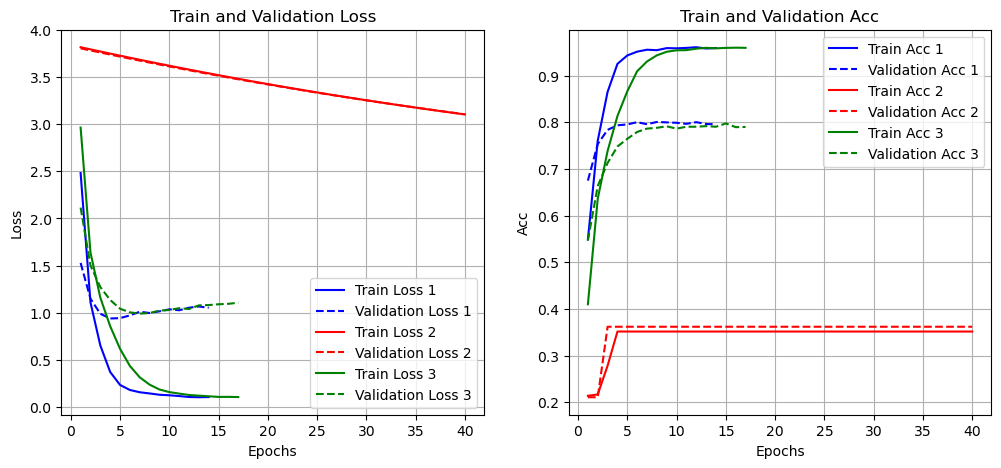

In [162]:
diff_history(history, zero_history, normal_history)

#### Xavier(Glorot) 초기화

- Xavier(Glorot) 초기화 방법 결과를 비교를 위해서 모델을 생성하고 학습

In [163]:
glorot_history = build_model(initializer=initializers.GlorotNormal())

c:\Users\kksoo\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 2s 76ms/step - loss: 2.8057 - acc: 0.5177 - val_loss: 1.8266 - val_acc: 0.6362
Epoch 2/40
18/18 [==============================] - 1s 50ms/step - loss: 1.3691 - acc: 0.7108 - val_loss: 1.2850 - val_acc: 0.7159
Epoch 3/40
18/18 [==============================] - 1s 54ms/step - loss: 0.8756 - acc: 0.8145 - val_loss: 1.0797 - val_acc: 0.7671
Epoch 4/40
18/18 [==============================] - 1s 50ms/step - loss: 0.5718 - acc: 0.8851 - val_loss: 0.9787 - val_acc: 0.7867
Epoch 5/40
18/18 [==============================] - 1s 50ms/step - loss: 0.3763 - acc: 0.9248 - val_loss: 0.9387 - val_acc: 0.7845
Epoch 6/40
18/18 [==============================] - 1s 57ms/step - loss: 0.2631 - acc: 0.9419 - val_loss: 0.9265 - val_acc: 0.7930
Epoch 7/40
18/18 [==============================] - 1s 57ms/step - loss: 0.2010 - acc: 0.9527 - val_loss: 0.9447 - val_acc: 0.7961
Epoch 8/40
18/18 [==============================] - 1s 50ms/step - loss: 0.1649 - a

- Xavier 초기화 방법은 기존 모델에서 사용하는 균일분포와 매우 유사한 형태로 학습된 것을 알 수 있음

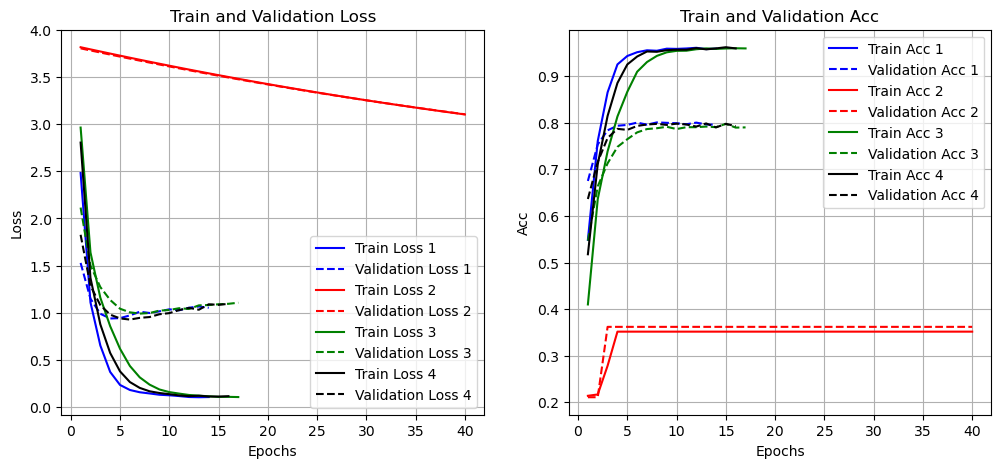

In [164]:
diff_history(history, zero_history, normal_history, glorot_history)

#### He 초기화

- He 초기화 방법도 비교를 위해서 모델을 생성하고 학습

In [165]:
he_history = build_model(initializer=initializers.HeNormal())

c:\Users\kksoo\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 2s 68ms/step - loss: 2.7689 - acc: 0.4925 - val_loss: 1.7878 - val_acc: 0.6532
Epoch 2/40
18/18 [==============================] - 1s 54ms/step - loss: 1.2827 - acc: 0.7340 - val_loss: 1.2327 - val_acc: 0.7293
Epoch 3/40
18/18 [==============================] - 1s 51ms/step - loss: 0.7886 - acc: 0.8362 - val_loss: 1.0406 - val_acc: 0.7703
Epoch 4/40
18/18 [==============================] - 1s 57ms/step - loss: 0.5011 - acc: 0.9009 - val_loss: 0.9552 - val_acc: 0.7836
Epoch 5/40
18/18 [==============================] - 1s 51ms/step - loss: 0.3283 - acc: 0.9312 - val_loss: 0.9308 - val_acc: 0.7903
Epoch 6/40
18/18 [==============================] - 1s 53ms/step - loss: 0.2324 - acc: 0.9447 - val_loss: 0.9246 - val_acc: 0.8028
Epoch 7/40
18/18 [==============================] - 1s 53ms/step - loss: 0.1834 - acc: 0.9537 - val_loss: 0.9554 - val_acc: 0.7943
Epoch 8/40
18/18 [==============================] - 1s 54ms/step - loss: 0.1558 - a

- He 초기화는 기존 모델과 비교하여 작지만 좀 더 빠르게 학습된 것을 알 수 있음
- 현재 모델이 비선형 함수인 `relu`를 사용하여 He 초기화에 더 적합한 것을 알 수 있음

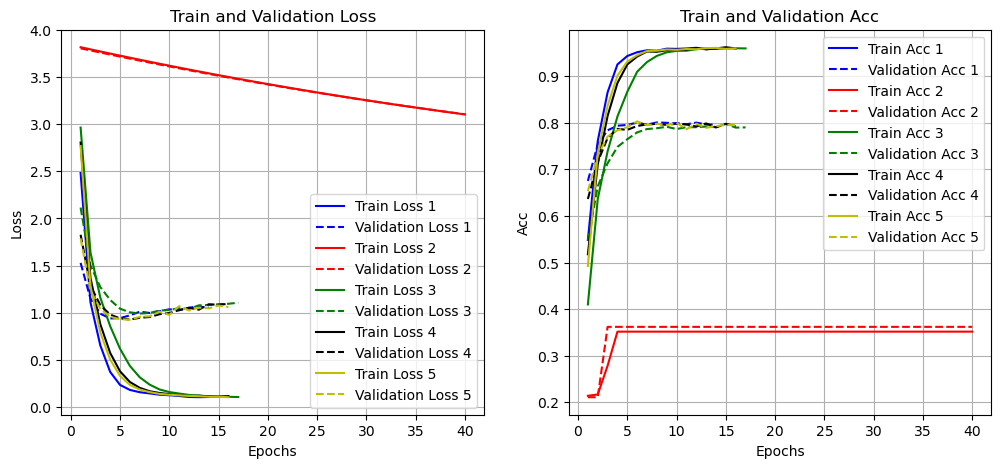

In [166]:
diff_history(history, zero_history, normal_history, glorot_history, he_history)

## 배치 정규화(Batch Normalization)

- 배치 정규화는 모델에 입력되는 샘플들을 균일하게 만드는 방법으로 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것을 의미
- 보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행하여 학습 자체가 빨리 진행될 수 있도록 만들어주고, 학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줌
- 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행
- 배치 정규화는 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 레이어에 들어갔다는 보장이 없으므로 주로 `Dense` 레이어 이후, 활성화 함수 이전에 활용

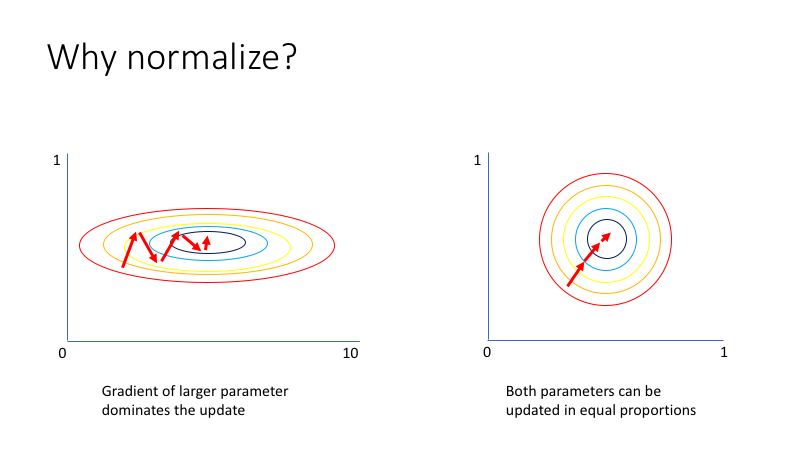

### 모델 구성 및 컴파일

- Reuters 데이터셋에 대해 뉴스 주제를 분류하는 딥러닝 모델에서 기존에 정의했던 3개의 `Dense` 레이어 사이에 배치 정규화를 위해 `BatchNormalization()` 레이어를 추가
- 일반적으로 `Dense` 레이어와 `Activation` 활성함수 레이어 사이에 추가

In [167]:
from keras.layers import Activation, BatchNormalization

inp = Input(shape=(max_idx + 1, ), name="Input")
hid_1 = Dense(128, kernel_initializer="he_normal", name="Dense_1")(inp)
bn_1 = BatchNormalization()(hid_1)
act_1 = Activation("relu")(bn_1)
hid_2 = Dense(128, kernel_initializer="he_normal", name="Dense_2")(act_1)
bn_2 = BatchNormalization()(hid_2)
act_2 = Activation("relu")(bn_2)
out = Dense(max_n + 1, activation="softmax", name="Output")(act_2)

model = Model(inputs=inp, outputs=out)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30982)]           0         
                                                                 
 Dense_1 (Dense)             (None, 128)               3965824   
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 Dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                         

In [168]:
batch_norm_history = model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/40
18/18 [==============================] - 2s 71ms/step - loss: 1.9790 - acc: 0.6074 - val_loss: 3.2940 - val_acc: 0.7044
Epoch 2/40
18/18 [==============================] - 1s 55ms/step - loss: 0.7399 - acc: 0.8520 - val_loss: 2.9771 - val_acc: 0.7480
Epoch 3/40
18/18 [==============================] - 1s 52ms/step - loss: 0.4109 - acc: 0.9250 - val_loss: 2.7561 - val_acc: 0.7275
Epoch 4/40
18/18 [==============================] - 1s 54ms/step - loss: 0.2519 - acc: 0.9499 - val_loss: 2.5144 - val_acc: 0.7048
Epoch 5/40
18/18 [==============================] - 1s 51ms/step - loss: 0.1742 - acc: 0.9569 - val_loss: 2.2606 - val_acc: 0.7044
Epoch 6/40
18/18 [==============================] - 1s 55ms/step - loss: 0.1392 - acc: 0.9575 - val_loss: 2.0225 - val_acc: 0.7017
Epoch 7/40
18/18 [==============================] - 1s 51ms/step - loss: 0.1186 - acc: 0.9575 - val_loss: 1.8134 - val_acc: 0.7199
Epoch 8/40
18/18 [==============================] - 1s 56ms/step - loss: 0.1082 - a

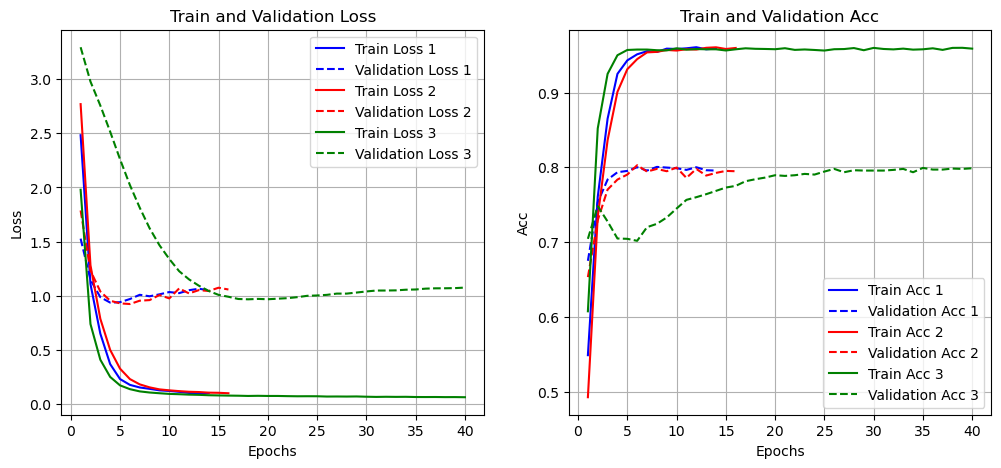

In [169]:
diff_history(history, he_history, batch_norm_history)

- 기본 모델과 배치 정규화를 적용한 모델을 비교해보면, 배치 정규화를 적용한 모델이 좀 더 빠르고 안정되게 학습이 되는 것을 알 수 있음